In [1]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(X, initial_centroids, max_iters=100, tolerance=1e-4):
    centroids = initial_centroids
    k = centroids.shape[0]
    cluster_assignments = np.zeros(X.shape[0])
    
    for iteration in range(max_iters):
        # Assignment step
        for i in range(X.shape[0]):
            distances = np.array([euclidean_distance(X[i], centroids[j]) for j in range(k)])
            cluster_assignments[i] = np.argmin(distances)
        
        # Update step
        new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) for j in range(k)])
        
        # Convergence check
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_assignments

# Data points matrix X
X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])

# Initial centroids
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

# Run KMeans
final_centroids, assignments = kmeans(X, initial_centroids)

print("Final centroids:")
print(final_centroids)
print("Cluster assignments:")
print(assignments)


Final centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Cluster assignments:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0.]


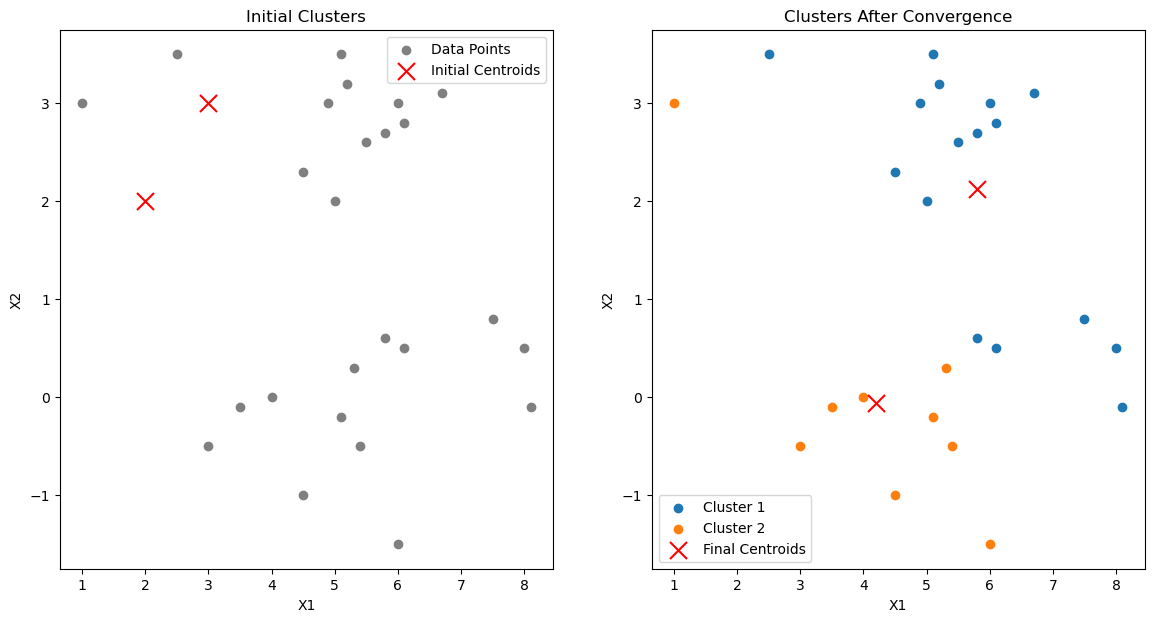

array([[ 5.8       ,  2.125     ],
       [ 4.2       , -0.05555556]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(X, initial_centroids, max_iters=100, tolerance=1e-4):
    centroids = initial_centroids
    k = centroids.shape[0]
    cluster_assignments = np.zeros(X.shape[0])
    history_centroids = [centroids.copy()]
    
    for iteration in range(max_iters):
        # Assignment step
        for i in range(X.shape[0]):
            distances = np.array([euclidean_distance(X[i], centroids[j]) for j in range(k)])
            cluster_assignments[i] = np.argmin(distances)
        
        # Update step
        new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) for j in range(k)])
        
        # Convergence check
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
            break
        
        centroids = new_centroids
        history_centroids.append(centroids.copy())
    
    return centroids, cluster_assignments, history_centroids

# Data points matrix X
X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])

# Initial centroids
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

# Run KMeans
final_centroids, assignments, history_centroids = kmeans(X, initial_centroids)

# Plotting

# Enhanced Plotting with Cluster Labels

plt.figure(figsize=(14, 7))

# Initial configuration
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', label='Initial Centroids', marker='x', s=150)
plt.title("Initial Clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Final configuration
plt.subplot(1, 2, 2)
for cluster_id in range(len(final_centroids)):
    cluster_points = X[assignments == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', label='Final Centroids', marker='x', s=150)
plt.title("Clusters After Convergence")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()


final_centroids


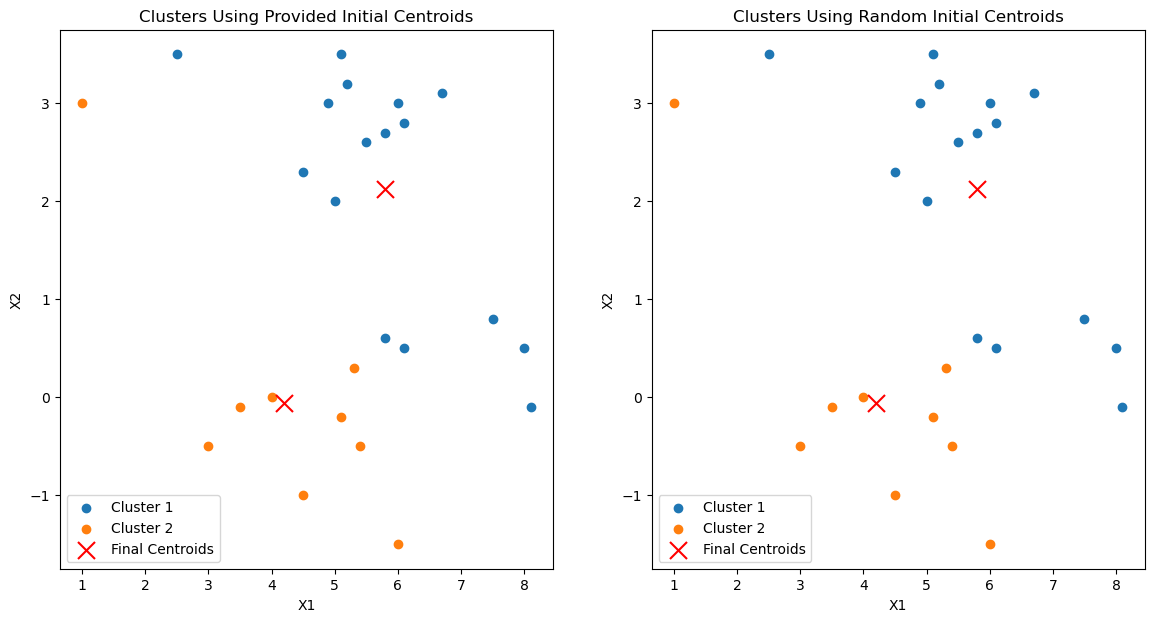

(array([[ 5.8       ,  2.125     ],
        [ 4.2       , -0.05555556]]),
 array([[ 5.8       ,  2.125     ],
        [ 4.2       , -0.05555556]]))

In [4]:
# Function to initialize random centroids
def initialize_random_centroids(X, k):
    np.random.seed(42)  # Ensuring reproducibility
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]

# Run KMeans with random initialization
random_initial_centroids = initialize_random_centroids(X, 2)
random_final_centroids, random_assignments, _ = kmeans(X, random_initial_centroids)

# Plot comparison
plt.figure(figsize=(14, 7))

# Results with provided initial centroids
plt.subplot(1, 2, 1)
for cluster_id in range(len(final_centroids)):
    cluster_points = X[assignments == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', label='Final Centroids', marker='x', s=150)
plt.title("Clusters Using Provided Initial Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Results with random initialization
plt.subplot(1, 2, 2)
for cluster_id in range(len(random_final_centroids)):
    cluster_points = X[random_assignments == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
plt.scatter(random_final_centroids[:, 0], random_final_centroids[:, 1], c='red', label='Final Centroids', marker='x', s=150)
plt.title("Clusters Using Random Initial Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()

final_centroids, random_final_centroids


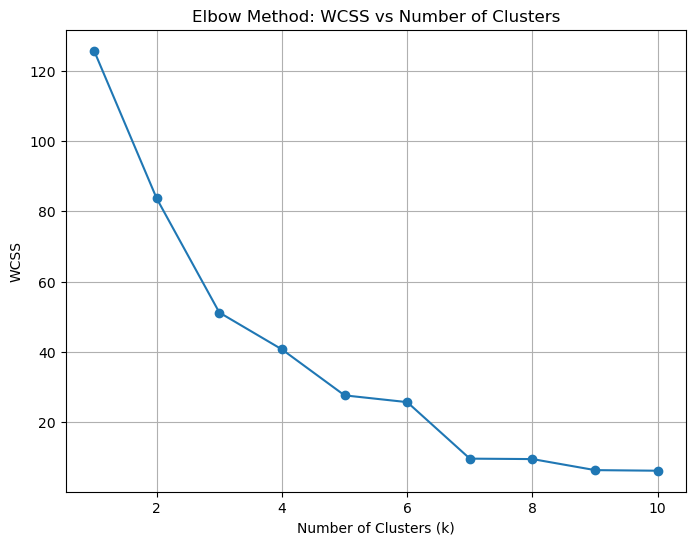

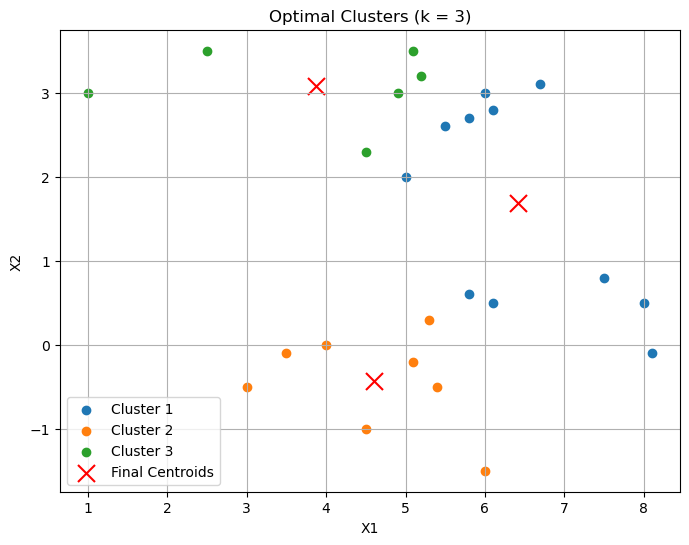

In [5]:
# Function to calculate WCSS
def calculate_wcss(X, centroids, assignments):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[assignments == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

# Elbow method to find optimal k
max_clusters = 10
wcss_values = []

for k in range(1, max_clusters + 1):
    random_centroids = initialize_random_centroids(X, k)
    final_centroids, assignments, _ = kmeans(X, random_centroids)
    wcss = calculate_wcss(X, final_centroids, assignments)
    wcss_values.append(wcss)

# Plotting WCSS vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o', linestyle='-')
plt.title("Elbow Method: WCSS vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Selecting the optimal k (elbow point)
optimal_k = 3  # Determined by visual inspection of the plot

# Perform clustering with optimal k
optimal_centroids = initialize_random_centroids(X, optimal_k)
final_centroids_optimal, assignments_optimal, _ = kmeans(X, optimal_centroids)

# Plot the resulting clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    cluster_points = X[assignments_optimal == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
plt.scatter(final_centroids_optimal[:, 0], final_centroids_optimal[:, 1], c='red', label='Final Centroids', marker='x', s=150)
plt.title(f"Optimal Clusters (k = {optimal_k})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()
